# 1. 데이터 로드, 데이터 분석

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import pickle
with open('df.pickle', 'rb') as f:
    dataset = pickle.load(f)

In [4]:
len(dataset)

59920

In [4]:
# 훈련데이터와 테스트데이터 분리
data = dataset['Review']
target = dataset['Label']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,target,test_size=0.2,shuffle=True,stratify=target,random_state=24)

In [5]:
print('총 X 훈련 샘플의 수 : ', len(x_train))
print('총 y 훈련 샘플의 수 : ', len(y_train))
print('총 X 테스트 샘플의 수 : ', len(x_test))
print('총 y 테스트 샘플의 수 : ', len(y_test))

총 X 훈련 샘플의 수 :  47936
총 y 훈련 샘플의 수 :  47936
총 X 테스트 샘플의 수 :  11984
총 y 테스트 샘플의 수 :  11984


In [9]:
sum(dataset['Label'] == 1) // sum(dataset['Label']== 0)

11

<AxesSubplot:>

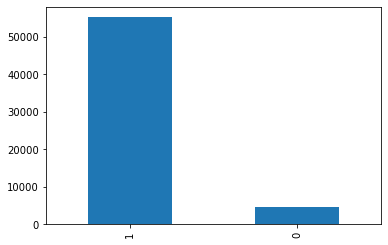

In [10]:
dataset.Label.value_counts().plot(kind='bar')

# 2. BERT - FineTuning(Sentence analasis)
## 2-1. 정수 인코딩

In [7]:
from transformers import BertTokenizerFast

tokenizer = BertTokenizerFast.from_pretrained("klue/bert-base")

In [8]:
X_train_list = x_train.tolist()
X_test_list = x_test.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()

In [9]:
X_train = tokenizer(X_train_list, truncation=True, padding=True)
X_test = tokenizer(X_test_list, truncation=True, padding=True)

In [10]:
print(X_train[0].tokens)

['[CLS]', '회가', '두툼', '##하니', '맛있', '##습', '##니다', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']


In [11]:
print(X_train[0].ids)

[2, 22705, 17918, 13679, 4550, 2219, 3606, 18, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [12]:
print(X_train[0].type_ids)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [13]:
print(X_train[0].attention_mask)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## 2-2. 데이터셋 생성 및 모델 학습

In [14]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_train),
    y_train
))

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_test),
    y_test
))

In [15]:
from transformers import TFBertForSequenceClassification
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)

In [18]:
model = TFBertForSequenceClassification.from_pretrained("klue/bert-base", num_labels=2, from_pt=True)
model.compile(optimizer=optimizer, loss=model.compute_loss, metrics=['accuracy'])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
model.compute_loss

<bound method TFPreTrainedModel.compute_loss of <transformers.models.bert.modeling_tf_bert.TFBertForSequenceClassification object at 0x000001C47B640A30>>

In [25]:
callback_earlystop = EarlyStopping(
    monitor="val_accuracy", 
    min_delta=0.003,
    patience=2)

model.fit(
    train_dataset.shuffle(5000).batch(16), epochs=5, batch_size=32,
    validation_data = val_dataset.shuffle(5000).batch(32),
    callbacks = [callback_earlystop]
)

Epoch 1/5
2996/2996 [==============================] - 2016s 673ms/step - loss: 0.0883 - accuracy: 0.9675 - val_loss: 0.2597 - val_accuracy: 0.9213
Epoch 2/5
2996/2996 [==============================] - 1910s 638ms/step - loss: 0.2098 - accuracy: 0.9208 - val_loss: 0.1818 - val_accuracy: 0.9214
Epoch 3/5
2996/2996 [==============================] - 1985s 663ms/step - loss: 0.1812 - accuracy: 0.9219 - val_loss: 0.1857 - val_accuracy: 0.9214


In [28]:
model.evaluate(val_dataset.batch(512))

24/24 [==============================] - 122s 5s/step - loss: 0.1857 - accuracy: 0.9214


[0.1856682151556015, 0.9213951826095581]

# 3. 모델 저장

In [29]:
model.save_pretrained('BERT_model/bert-base')
tokenizer.save_pretrained('BERT_model/bert-base')

('BERT_model/bert-base\\tokenizer_config.json',
 'BERT_model/bert-base\\special_tokens_map.json',
 'BERT_model/bert-base\\vocab.txt',
 'BERT_model/bert-base\\added_tokens.json',
 'BERT_model/bert-base\\tokenizer.json')

# 4. 모델 로드 및 테스트

In [30]:
from transformers import TextClassificationPipeline

# 로드하기
loaded_tokenizer = BertTokenizerFast.from_pretrained('BERT_model/bert-base')
loaded_model = TFBertForSequenceClassification.from_pretrained('BERT_model/bert-base')

text_classifier = TextClassificationPipeline(
    tokenizer=loaded_tokenizer, 
    model=loaded_model, 
    framework='tf',
    return_all_scores=True
)

Some layers from the model checkpoint at BERT_model/bert-base were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at BERT_model/bert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.
C:\Users\DanielJeong\AppData\Roaming\Python\Python39\site-packages\tr

## 2-3. 모델 테스트

In [31]:
def show_sentiment(text):
    result = text_classifier(text)[0]
    print('부정일 확률 : ', round(result[0]['score'],3))
    print('긍정일 확률 : ', round(result[1]['score'],3))

In [32]:
text_classifier('위생상태 불량')[0]

[{'label': 'LABEL_0', 'score': 0.33432087302207947},
 {'label': 'LABEL_1', 'score': 0.6656791567802429}]

In [44]:
text_classifier('친절하네요')[0]

[{'label': 'LABEL_0', 'score': 0.0011311981361359358},
 {'label': 'LABEL_1', 'score': 0.9988687634468079}]

In [47]:
text_classifier('양이 적어')[0]

[{'label': 'LABEL_0', 'score': 0.334321528673172},
 {'label': 'LABEL_1', 'score': 0.6656785011291504}]

In [34]:
show_sentiment('장소가 협소하네요')

부정일 확률 :  0.334
긍정일 확률 :  0.666


In [35]:
show_sentiment('비린맛이 심하네요')

부정일 확률 :  0.334
긍정일 확률 :  0.666


In [36]:
show_sentiment('맛은 좋지만 가성비가 떨어지네요')

부정일 확률 :  0.334
긍정일 확률 :  0.666


In [37]:
show_sentiment('알바가 친절하고 맛도 좋아요')

부정일 확률 :  0.001
긍정일 확률 :  0.999


In [38]:
show_sentiment('가성비 좋고, 맛도 무진장 좋아요')

부정일 확률 :  0.046
긍정일 확률 :  0.954


In [39]:
show_sentiment('가성비 좋고, 맛도 무진장 좋아요. 그런데 주차자리가 협소하네요')

부정일 확률 :  0.046
긍정일 확률 :  0.954


In [40]:
show_sentiment('굿')

부정일 확률 :  0.001
긍정일 확률 :  0.999


In [41]:
show_sentiment('개 좋다')

부정일 확률 :  0.334
긍정일 확률 :  0.666


In [42]:
show_sentiment('개 같다')

부정일 확률 :  0.334
긍정일 확률 :  0.666


In [43]:
show_sentiment('장사가 잘되니 초심을 잃었네요')

부정일 확률 :  0.334
긍정일 확률 :  0.666
